In [2]:
! wget https://vectorbase.org/common/downloads/Current_Release/AgambiaePEST/fasta/data/VectorBase-59_AgambiaePEST_Genome.fasta -O gambiae.fa

--2022-10-21 20:22:11--  https://vectorbase.org/common/downloads/Current_Release/AgambiaePEST/fasta/data/VectorBase-59_AgambiaePEST_Genome.fasta
Resolving vectorbase.org (vectorbase.org)... 128.91.204.54
Connecting to vectorbase.org (vectorbase.org)|128.91.204.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 286083264 (273M) [application/x-fasta]
Saving to: ‘gambiae.fa’

gambiae.fa          100%[===================>] 272.83M  7.21MB/s    in 51s     

2022-10-21 20:23:02 (5.36 MB/s) - ‘gambiae.fa’ saved [286083264/286083264]



In [3]:
! gzip -9 gambiae.fa

In [4]:
! wget https://vectorbase.org/common/downloads/Current_Release/AatroparvusEBRO/fasta/data/VectorBase-59_AatroparvusEBRO_Genome.fasta -O atroparvus.fa

--2022-10-21 20:26:43--  https://vectorbase.org/common/downloads/Current_Release/AatroparvusEBRO/fasta/data/VectorBase-59_AatroparvusEBRO_Genome.fasta
Resolving vectorbase.org (vectorbase.org)... 128.91.204.54
Connecting to vectorbase.org (vectorbase.org)|128.91.204.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229179966 (219M) [application/x-fasta]
Saving to: ‘atroparvus.fa’

atroparvus.fa       100%[===================>] 218.56M  5.85MB/s    in 31s     

2022-10-21 20:27:15 (6.97 MB/s) - ‘atroparvus.fa’ saved [229179966/229179966]



In [5]:
! gzip -9 atroparvus.fa

Let’s start by listing the chromosomes of the Anopheles gambiae genome: </br>
This will produce an output that will include the organism chromosomes

In [8]:
import gzip
from Bio import SeqIO
gambiae_name = 'gambiae.fa.gz'
atroparvus_name = 'atroparvus.fa.gz'
recs = SeqIO.parse(gzip.open(gambiae_name, 'rt',
encoding='utf-8'), 'fasta')
for rec in recs:
  print(rec.description)

AgamP4_2L | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=49364325 | SO=chromosome
AgamP4_2R | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=61545105 | SO=chromosome
AgamP4_3L | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=41963435 | SO=chromosome
AgamP4_3R | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=53200684 | SO=chromosome
AgamP4_UNKN | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=42389979 | SO=chromosome
AgamP4_X | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=24393108 | SO=chromosome
AgamP4_Y_unplaced | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=237045 | SO=chromosome
AAAB01000047 | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=21505 | SO=supercontig
AAAB01000163 | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=28420 | SO=supercontig
AAAB01000448 | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=22809 | SO=supercontig
AAAB01000791 | organism=Anopheles_gambia

Do not perform this with Anopheles atroparvus; otherwise, you will get more than a thousand
entries, courtesy of the scaffold status.

Now, let’s check the uncalled positions (Ns) and their distribution for the Anopheles gambiae genome:

In [9]:
recs = SeqIO.parse(gzip.open(gambiae_name, 'rt', encoding='utf-8'), 'fasta')
# We have two dictionaries: 
# one dictionary that contains chromosome sizes 
# and another that contains the distribution of the sizes of runs of Ns. 
chrom_Ns = {}
chrom_sizes = {}
for rec in recs:
    if rec.description.find('supercontig') > -1:
        continue
    print(rec.description, rec.id, rec)
    chrom = rec.id.split('_')[1]
    if chrom in ['UNKN']:#, 'Y_unplaced']:
        continue
    chrom_Ns[chrom] = []
    on_N = False
    curr_size = 0
    for pos, nuc in enumerate(rec.seq):
        if nuc in ['N', 'n']:
            curr_size += 1
            on_N = True
        else:
            if on_N:
                chrom_Ns[chrom].append(curr_size)
                curr_size = 0
            on_N = False
    if on_N:
        chrom_Ns[chrom].append(curr_size)
    chrom_sizes[chrom] = len(rec.seq)

for chrom, Ns in chrom_Ns.items():
    size = chrom_sizes[chrom]
    if len(Ns) > 0:
        max_Ns = max(Ns)
    else:
        max_Ns = 'NA'
    print(f'{chrom} ({size}): %Ns ({round(100 * sum(Ns) / size, 1)}), num Ns: {len(Ns)}, max N: {max_Ns}')


AgamP4_2L | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=49364325 | SO=chromosome AgamP4_2L ID: AgamP4_2L
Name: AgamP4_2L
Description: AgamP4_2L | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=49364325 | SO=chromosome
Number of features: 0
Seq('AACCATGGTCCAGAGTACACATTGACTATGCAGGCCTAGTAGACGAATTCTACT...AAA')
AgamP4_2R | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=61545105 | SO=chromosome AgamP4_2R ID: AgamP4_2R
Name: AgamP4_2R
Description: AgamP4_2R | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=61545105 | SO=chromosome
Number of features: 0
Seq('CTCTAAACATTAATAAAACCAAATACATGATCATATCAAACAAAAATAATCAAG...ACA')
AgamP4_3L | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=41963435 | SO=chromosome AgamP4_3L ID: AgamP4_3L
Name: AgamP4_3L
Description: AgamP4_3L | organism=Anopheles_gambiae_PEST | version=AgamP4 | length=41963435 | SO=chromosome
Number of features: 0
Seq('ACGAAAAGCCAATTGTAAAAAAACCATACACGCGTCGAAACACGACAAACCAAG...TCC')
A

So, for the 2L chromosome arm (with a size of 49 Mbp), 1.7% are N calls divided by 957
runs. The biggest run is 28884 bps. Note that the X chromosome has the highest fraction of
positions with Ns.

Now, let’s turn our attention to the Anopheles Atroparvus genome. Let’s count the number of scaffolds, along with the distribution of scaffold sizes:

This code is similar to what we looked at previously, but we print slightly more detailed statistics using *NumPy*

In [10]:
import numpy as np
recs = SeqIO.parse(gzip.open(atroparvus_name, 'rt', encoding='utf-8'), 'fasta')
sizes = []
size_N = []
for rec in recs:
    size = len(rec.seq)
    sizes.append(size)
    count_N = 0
    for nuc in rec.seq:
        if nuc in ['n', 'N']:
            count_N += 1
    size_N.append((size, count_N / size))

print(len(sizes), np.median(sizes), np.mean(sizes), max(sizes), min(sizes),
      np.percentile(sizes, 10), np.percentile(sizes, 90))

1320 7811.5 170678.20075757575 58369459 1004 1537.1000000000001 39644.70000000007


Thus, we have 1371 scaffolds (against seven entries on the Anopheles gambiae genome) with
a median size of 7811.5 (a mean of 17,0678.2). The biggest scaffold is 5.8 Mbp, while
the smallest scaffold is 1,004 bp. The tenth percentile for size is 1537.1, while the ninetieth
is 39644.7.

Finally, let’s plot the fraction of the scaffold – that is, N – as a function of its size:

The preceding code will generate the output shown in the following diagram, in which we split the chart into three parts based on the scaffold size: one for scaffolds with less than 4,800
bp, one for scaffolds between 4,800 and 540,000 bp, and one for larger ones. The fraction of
Ns is very low for small scaffolds (always below 3.5%); for medium scaffolds, it has a large
variance (sizes between 0% and above 90%), and a tighter variance (between 0% and 25%) for the largest scaffolds:

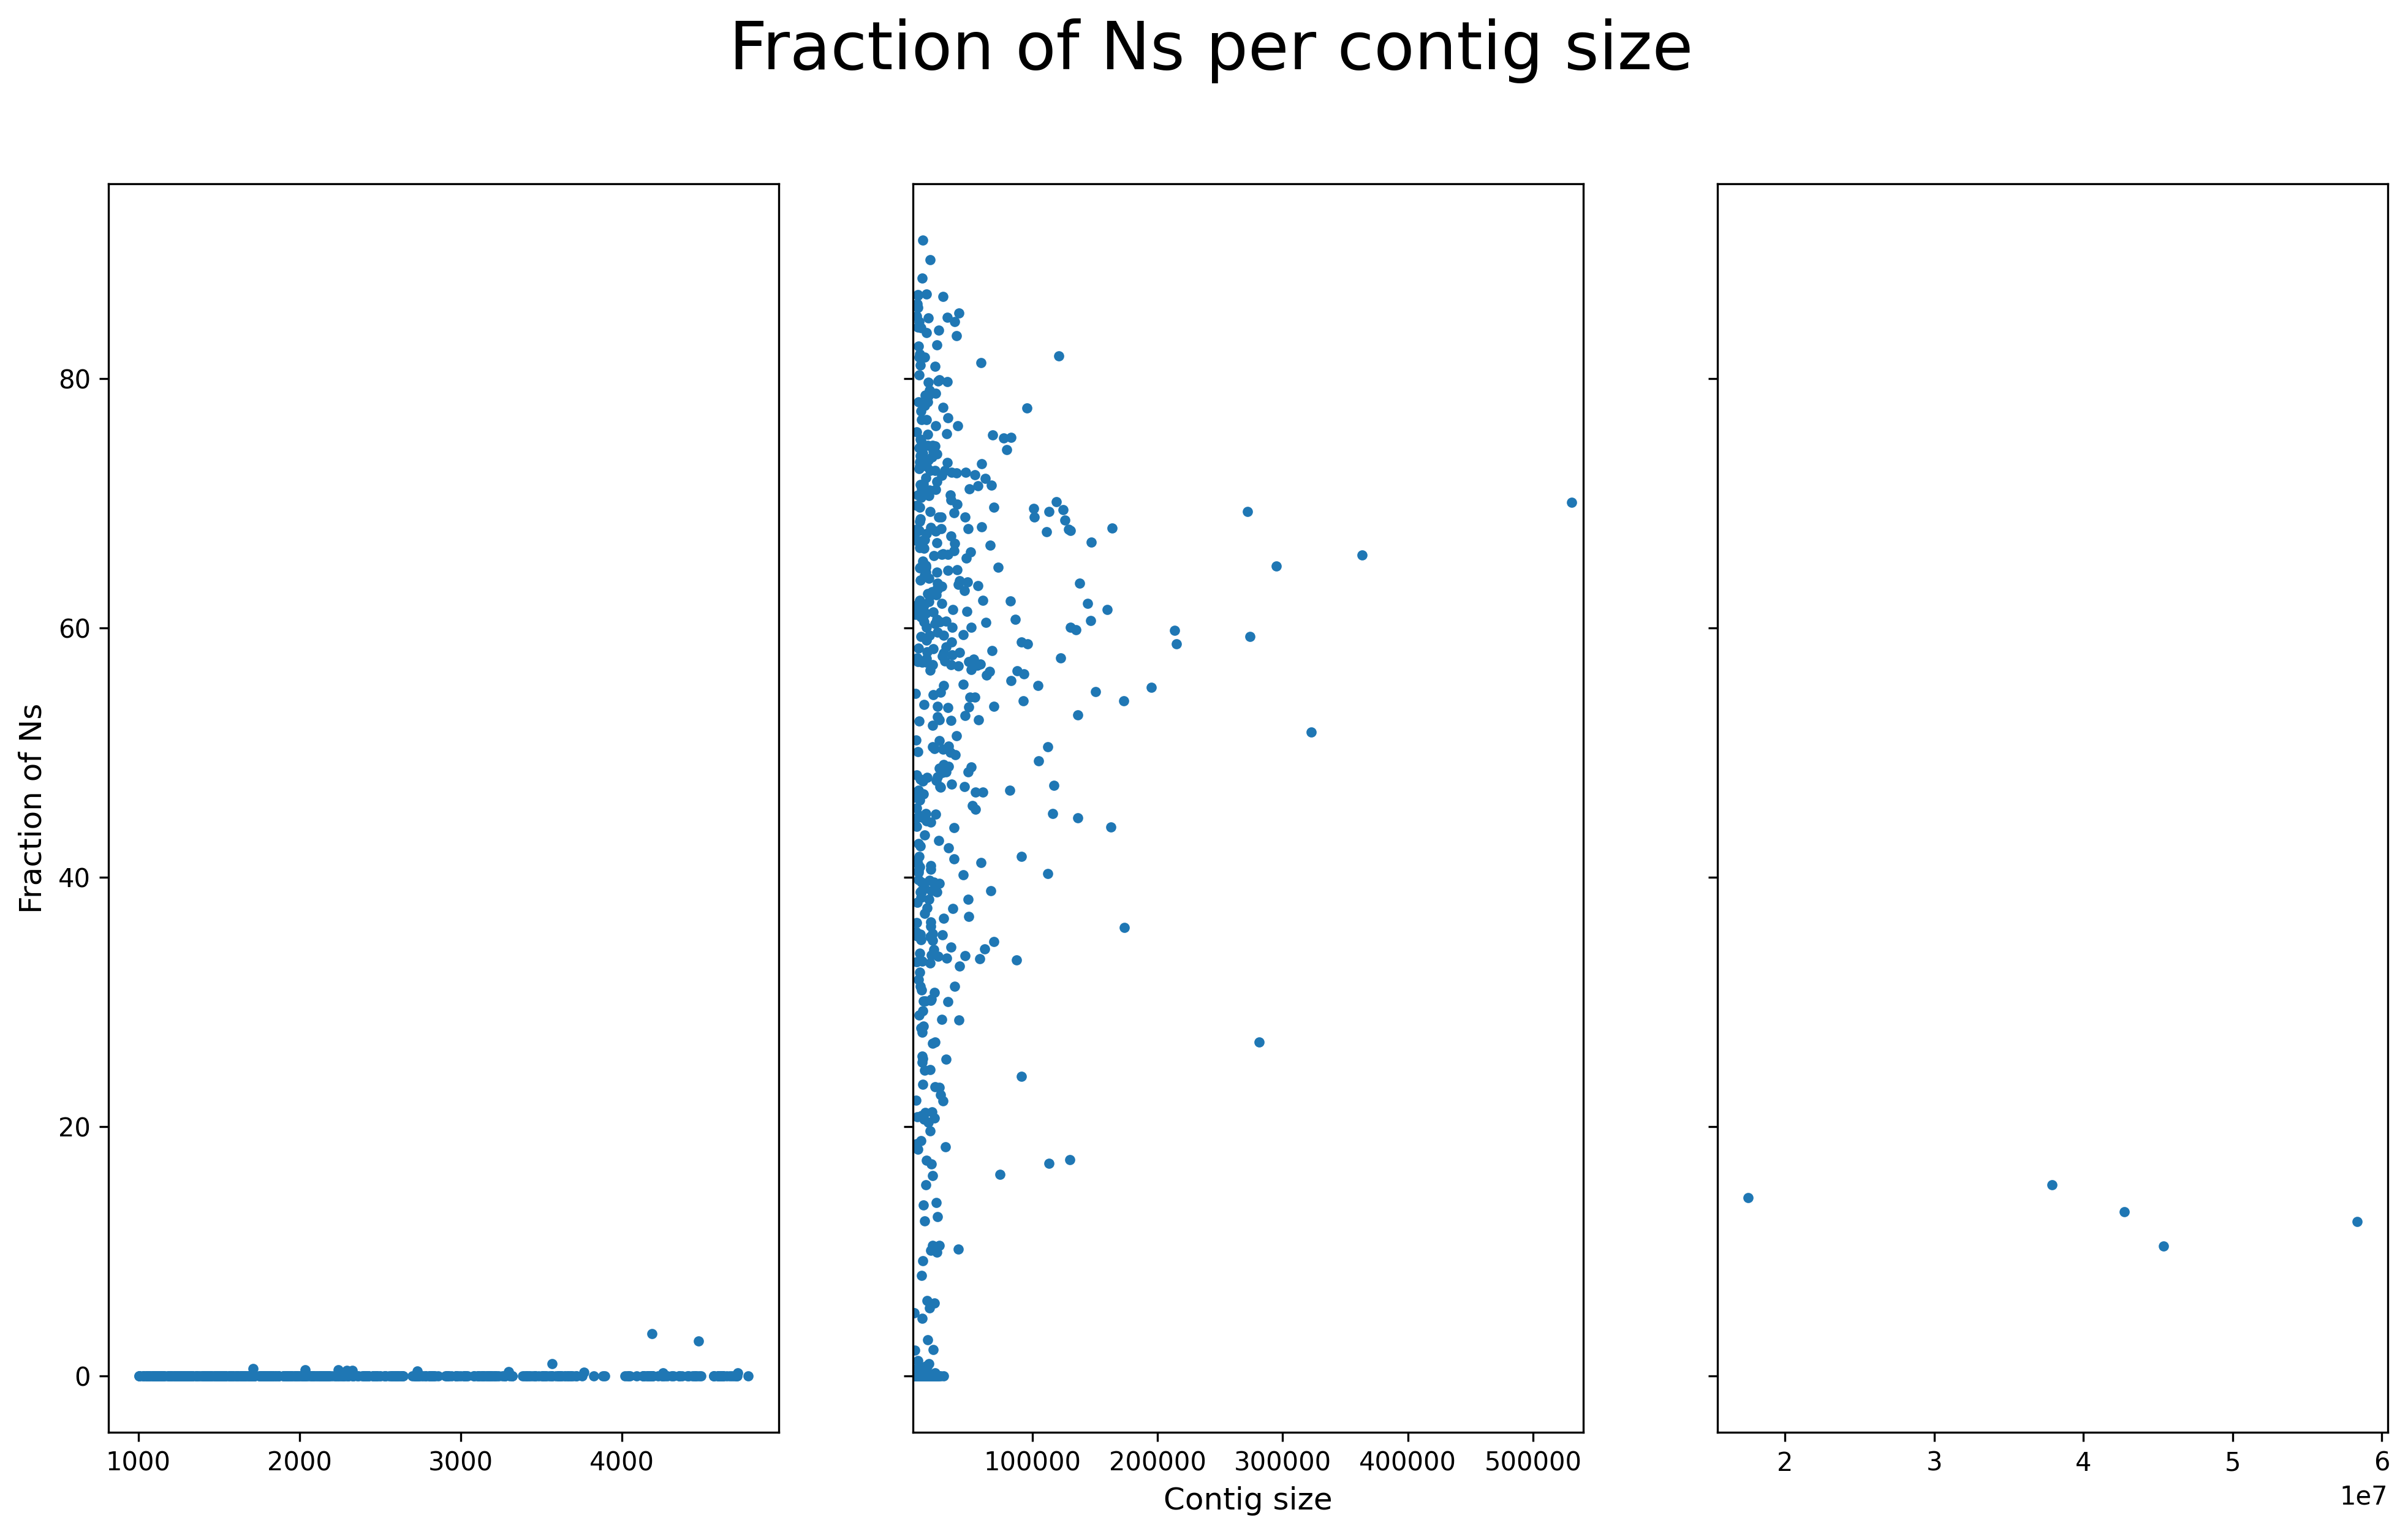

In [11]:
import matplotlib.pyplot as plt

small_split = 4800
large_split = 540000
fig, axs = plt.subplots(1, 3, figsize=(16, 9), dpi=300, squeeze=False, sharey=True)
xs, ys = zip(*[(x, 100 * y) for x, y in size_N if x <= small_split])
axs[0, 0].plot(xs, ys, '.')
xs, ys = zip(*[(x, 100 * y) for x, y in size_N if x > small_split and x <= large_split])
axs[0, 1].plot(xs, ys, '.')
axs[0, 1].set_xlim(small_split, large_split)
xs, ys = zip(*[(x, 100 * y) for x, y in size_N if x > large_split])
axs[0, 2].plot(xs, ys, '.')
axs[0, 0].set_ylabel('Fraction of Ns', fontsize=12)
axs[0, 1].set_xlabel('Contig size', fontsize=12)
fig.suptitle('Fraction of Ns per contig size', fontsize=26)
fig.show()